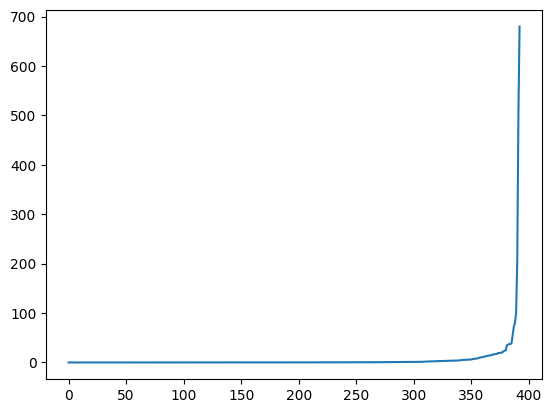

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read in our card database json
df = pd.read_json('default-cards-20220912210801.json')

#create dummy arrays to hold data for sorting / merging
name_list = df['name'].copy()
price_list = df['prices'].copy()

#array to hold the sorted name and price data
price_array = [0] * 500

#for loop to extract the first entry from each dictionary in the price_list
for i in range(0, 500):
    #get the usd price of each card
    first_pair = list(price_list[i].items())[0]
    
    #add the price to the second [i][1] index of our name_price_array
    price_array[i] = first_pair[1]

#for loop to extract first 500 names in name_list array
sortable_names = [''] * 500
for i in range(0, 500):
    sortable_names[i] = name_list[i]

#numpify our arrays to add them to a dataframe
nump_names = np.asarray(sortable_names)
nump_prices = np.asarray(price_array)

#create our dataframe
name_price = pd.DataFrame(nump_names)

#add a column
name_price['price'] = nump_prices

#convert price column to floats
name_price.price = name_price.price.astype(float)

#find list of ascending values for nice graph
name_price = name_price.sort_values('price')
temp_ascending = np.asarray(name_price['price'])

#sort via price column
name_price = name_price.sort_values('price', ascending=False)

name_price = name_price.dropna()

name_price.head()

temp_prices = np.asarray(name_price['price'])

plt.plot(temp_ascending)